# Demystifying Gradient Descent

The Goal  
The goal of any machine learning problem is to minimize the error to achieve maximum accuracy or predictability.

The Cost Function  
The cost functions gives deeper and finer insight into the error component. What is left out is minimizing the error.

$$Net Loss = -\frac{1}{n} \sum_{i=1}^n y^{(i)}\log (\hat{y_{i}}) + (1-y^{(i)})\log (1-\hat{y_{i}})\tag{1} $$

What is Gradient Descent?
- It is an optimization alogrithm
- It's goal is to minimize the given function(eg. a polynomial function) iteratively 
- That is, find the right coefficients for the polynomial to minimize the output
- A right analogy could be, you are standing on the peak of a mountaineous range and your goal is to reach the lowest point of the range by crossing various peaks
- In the process of reaching lowest point(local minima) one will ascent and descent repeatedly 
- This iterative process is quite analogous to gradient descent, note there are ascents as well 
- Local Minima, why not Global Minima - A global minima(our aspirations are high) can be achieved only during singularity, until then let us wait

Some Assumptions and Presumptions
- Let us say we have $m$ features available to predict an outcome
- For example these features could be humidity, pressure, date of the year etc to predict - Whether there is a rain or not?
- Let $n$ be the number of samples we have in the dataset - ie 10 years of daily weather observations, 365 * 10 is $n$
- With m features and n samples, our data matrix looks as follows

|   	|$x_1$   	| $x_2$  	|$x_3$   	|$...$   	|$x_j$   	|$...$   	|$x_m$   	|
|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|:-:	|
|$1$   	|0.999   	|True   	|0.001   	|$...$   	|1   	|$...$   	|$A$   	|
|$2$   	|0.001   	|False   	|0.001   	|$...$   	|5   	|$...$   	|$C$   	|
|$3$   	|0.999   	|False   	|6.90   	| $...$  	|2   	|$...$   	|$X$   	|
|$.$   	|.   	|.   	|.   	|$.$   	|.   	|$.$   	|$.$   	|
|$i$   	|0.423   	|False   	|0.092   	|$...$   	|5   	|$...$   	|$E$   	|
|$.$   	|.   	|.   	|.   	|$.$   	|.   	|$.$   	|$.$   	|
|$n$   	|0.632   	|False   	|2.0   	|$...$   	|1   	|$...$   	|$B$   	|


Dimension  of  our  dataset is $$n \times m $$

Let $\theta$ be the weights or coefficients of the polynomial function, then
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_m
\end{pmatrix}$$

The Polynomial Function  
Let us derive the polynomial function of intereste that we are trying to minimize will be $\theta \times x$, ie

\begin{equation*}
f(x) = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_m
\end{pmatrix} \times 
\begin{pmatrix}
x_1 & x_2 & x_3 \cdots & x_m
\end{pmatrix}
\end{equation*}

$$ie$$
$$f(x) = \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_i x_i + \cdots + \theta_m x_m\tag{2}$$

- Something unusual in the equation (2) $\theta_0$ is missing. It is the bias term, we shall talk about this some other day.
- Equation $f(x)$ represents only one observation in the dataset but we have $n$ observations in large

Then the equation transforms into
$$f(x_1) = \theta_{1, 1} x_{1, 1} + \theta_{1, 2} x_{1, 2} + \theta_{1, 3} x_{1, 3} + \cdots + \theta_{1, i} x_{1, i} + \cdots + \theta_{1, m} x_{1, m}$$
$$f(x_2) = \theta_{2, 1} x_{2, 1} + \theta_{2, 2} x_{2, 2} + \theta_{2, 3} x_{2, 3} + \cdots + \theta_{2, i} x_{2, i} + \cdots + \theta_{2, m} x_{2, m}$$
$$f(x_3) = \theta_{3, 1} x_{3, 1} + \theta_{3, 2} x_{3, 2} + \theta_{3, 3} x_{3, 3} + \cdots + \theta_{3, i} x_{3, i} + \cdots + \theta_{3, m} x_{3, m}$$
$$\vdots$$
$$f(x_n) = \theta_{n, 1} x_{n, 1} + \theta_{n, 2} x_{m, 2} + \theta_{n, 3} x_{n, 3} + \cdots + \theta_{n, i} x_{n, i} + \cdots + \theta_{n, m} x_{n, m}$$

Let us check the dimensions of all our variables for clarity, 1 extra for the bias which is not represented above  
- $\theta, (m+1, 1)$
- $X, (n, m+1)$
- the function  $f, (n, 1)$

The Activation Function  
- We have to predict the outcome with the above set of details we have
- ie The second part of our goal, minimize the error to predict the outcome. Rest all are repeated
- Let us call our prediction as h, in the cost function we called it y_hat or 𝑦^
- It is time for us to expand the variable y_hat with corresponding influencing variables

$$\hat{y} = h(f(x)) = h(x\theta) = h(z) \tag{3}$$

ie $\hat{y}$ is a function of $\theta$ and $x$ and we call it $z$

- Since it is a classification function, we are expecting a result value between $[0, 1]$
- Corresponding activation function is "Sigmoid"
- The beauty of sigmoid, it squeezes the output between $[0, 1]$
$$ie$$
$$h(z) = sigmoid(z)$$
$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{4}$$

The Finale - Gradient Descent  
- Once again, our goal is to minimize the error and identify the right corresponding coefficient
- From equation (2), $x.\theta$ we got $z$
- From equation (4), we got $h(x.\theta)$
- From equation (1), we got the error/loss/cost. Let us call it $J$
- Update $\theta$ iteratively by applying the following gradient descent function

$$\nabla_{\theta_j}J(\theta) = \frac{1}{n} \sum_{i=1}^n(h^{(i)}-y^{(i)})x_j \tag{5}$$

- $i$ is the index of all $m$ observations
- $j$ is the index of the weight associated with the corresponding $x_j$
- The weight $\theta_j$ is updated by subtracting a fraction of the gradient determined by the learning rate $\alpha$

$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) \tag{6}$$

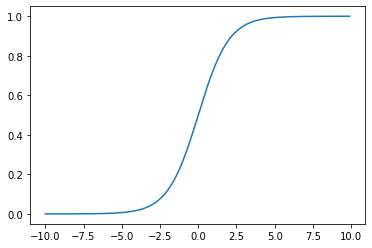

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z): 
    h = 1 / (1 + np.exp(-z))
    return h
x = np.arange(-10, 10, 0.1)
h = [sigmoid(a) for a in x]
plt.plot(x, h)